# Linking calculations

In [1]:
%config IPCompleter.evaluation='unsafe'

In [2]:
from pyiron_atomistics import Project
from atomrdf import KnowledgeGraph
import numpy as np

In [3]:
project = 'wf9d52b'
pr = Project(project)
kg = KnowledgeGraph(store='db', store_file=f'{project}.db')
kg.enable_workflow(pr, workflow_environment='pyiron')

Run a MD simulation; and get the relaxed structure

In [4]:
structure = pr.create.structure.annotated_structure.bulk('Cu', cubic=True, label='cu_min', repetitions=(3,3,3))
job = pr.create.job.Lammps('j1', delete_existing_job=True, delete_aborted_job=True)
job.structure = structure
job.potential = '2001--Mishin-Y--Cu-1--LAMMPS--ipr1'
job.calc_minimize(pressure=0)
job.run()
kg.add_workflow(job, workflow_environment='pyiron')

The job j1 was saved and received the ID: 1148


In [5]:
kg.samples

[cu_min, sample:a7f6ce8a-ce7d-4609-9aa3-56d7ddf21947_from_cu_min]

In [6]:
sample = kg.samples[-1]

The relaxed structure values are also calculation outputs

In [7]:
sample.outputs

TotalEnergy, TotalVolume, SimulationCellLength_x, SimulationCellLength_y, SimulationCellLength_z, Volume, NumberOfAtoms

In [8]:
a = sample.outputs.SimulationCellLength_x/3

In [9]:
a

3.615 ANGSTROM

Now create a new structure with this and run a MD simulation

In [10]:
rel_struct = pr.create.structure.annotated_structure.bulk('Cu', cubic=True, label='cu_new',
                                                    a=a, repetitions=(3,3,3))

In [11]:
job = pr.create.job.Lammps('j1', delete_existing_job=True, delete_aborted_job=True)
job.structure = rel_struct
job.potential = '2001--Mishin-Y--Cu-1--LAMMPS--ipr1'
job.calc_md(pressure=0, temperature=300)
job.run()
kg.add_workflow(job, workflow_environment='pyiron')

The job j1 was saved and received the ID: 1148


Check the KG

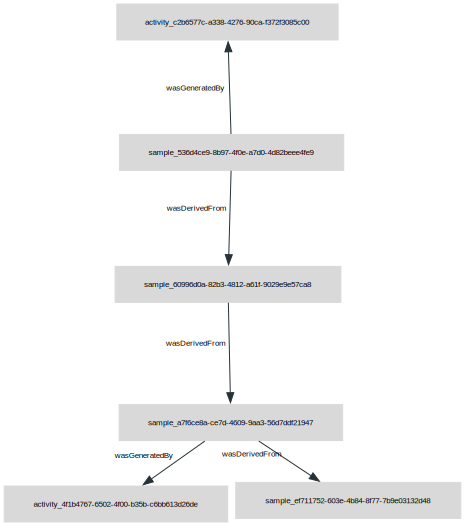

In [17]:
kg.visualise(sample_view=True)

We can also query and see the lattice parameter was calculated by an activity

In [16]:
kg.auto_query(kg.terms.cmso.LatticeParameter, [kg.terms.asmo.wasCalculatedBy])

,LatticeParameter,wasCalculatedBy
0,sample:60996d0a-82b3-4812-a61f-9029e9e57ca8_La...,operation:04fc5b80-11c0-4b7f-9125-0e04516807c6
